In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.colors
import numpy as np
import glob
import re 



In [15]:
# file_base = 'data/Fun4All_G4_EICDetector_MaterialScan_'
# file_base = 'data/Fun4All_G4_EICDetector_MaterialScan3_TPCEndCap'
file_base = 'data/Fun4All_G4_EICDetector_MaterialScan4_TPCEndCap'

filenames = glob.glob(os.path.join(f'{file_base}*.log'))
print((filenames))
filenames.sort();

DataSetLables = {
    1: 'TPC EndCap'
};
print(DataSetLables)

CautiousLabel = 'TPC end-cap only'

mpl.style.use('seaborn-talk')

['data/Fun4All_G4_EICDetector_MaterialScan4_TPCEndCap.log']
{1: 'TPC EndCap'}


In [16]:
temp = re.compile("^\s+([-+]?\d*\.?\d*)\s+([-+]?\d*\.?\d*)\s+([-+]?\d*\.?\d*)\s+([-+]?\d*\.?\d*e?[-+]?\d*)\s+([-+]?\d*\.?\d*e?[-+]?\d*)\s*$") 
Setups = [];
Thetas = [];
Phis = [];
Lengths = [];
x0s = [];
lambda0s = [];

for filename in filenames:
    
    filename_base = os.path.basename(filename)
    
#     setupID = int(filename_base.split('.')[0].split('_')[-1]);
    setupID = 1;
    
    if setupID>=10 :
        print(f'Skip {setupID}: {filename}')
        continue;
    
    cnt = 0;
    file1 = open(filename, 'r') 
    Lines = file1.readlines() 
    for line in Lines: 
    #     line = line.strip();  

        match = temp.match(line) 

        if match:
            res = match.groups()
            if (len(res) == 5):

    #             print (line)
    #             print (res)            
                scanData = [float(n) for n in res]

                if (scanData[1]<=360 ):
                    Setups.append(setupID) 
                    Thetas.append(scanData[0]) 
                    Phis.append(scanData[1]) 
                    Lengths.append(scanData[2]) 
                    x0s.append(scanData[3]) 
                    lambda0s.append(scanData[4]) 

                    cnt = cnt +1
                
    print(f'{setupID}: {filename} -> {cnt} records')
    
    


1: data/Fun4All_G4_EICDetector_MaterialScan4_TPCEndCap.log -> 1986985 records


In [17]:
df = pd.DataFrame(
    {'Setup':Setups, 
     'Theta':Thetas,
     'Phi': Phis,
     'Length': Lengths,
     'x0':x0s,
     'lambda0':lambda0s,
    });
df.set_index(['Setup','Theta','Phi'], inplace=True)
df.sort_index(level = 2)

df

Length            x0       lambda0
Setup Theta    Phi                                           
1     -80.6148 3.00000    5067.84  8.038630e-25  1.447950e-24
               3.17991    5067.84  8.038630e-25  1.447950e-24
               3.35982    5067.84  8.038630e-25  1.447950e-24
               3.53973    5067.84  8.038630e-25  1.447950e-24
               3.71964    5067.84  8.038630e-25  1.447950e-24
...                           ...           ...           ...
       80.6148 359.22200  5067.84  8.038630e-25  1.447950e-24
               359.40200  5067.84  8.038630e-25  1.447950e-24
               359.58200  5067.84  8.038630e-25  1.447950e-24
               359.76200  5067.84  8.038630e-25  1.447950e-24
               359.94200  5067.84  8.038630e-25  1.447950e-24

[1986985 rows x 3 columns]

In [18]:
print(df.index.levels[0].unique())
print(df.index.levels[1].unique())
print(df.index.levels[2].unique())



Int64Index([1], dtype='int64', name='Setup')
Float64Index([-80.6148,  -80.568, -80.5209, -80.4736, -80.4261, -80.3783,
              -80.3303, -80.2821, -80.2336, -80.1849,
              ...
               80.1849,  80.2336,  80.2821,  80.3303,  80.3783,  80.4261,
               80.4736,  80.5209,   80.568,  80.6148],
             dtype='float64', name='Theta', length=1001)
Float64Index([    3.0, 3.17991, 3.35982, 3.53973, 3.71964, 3.89955, 4.07946,
              4.25937, 4.43928, 4.61919,
              ...
              358.322, 358.502, 358.682, 358.862, 359.042, 359.222, 359.402,
              359.582, 359.762, 359.942],
             dtype='float64', name='Phi', length=1985)


In [19]:
# ave = df.loc[(9,0),:].mean(axis = 0) 

In [20]:
# x0_avg = df.loc[(9),:].groupby('Theta').x0.mean()

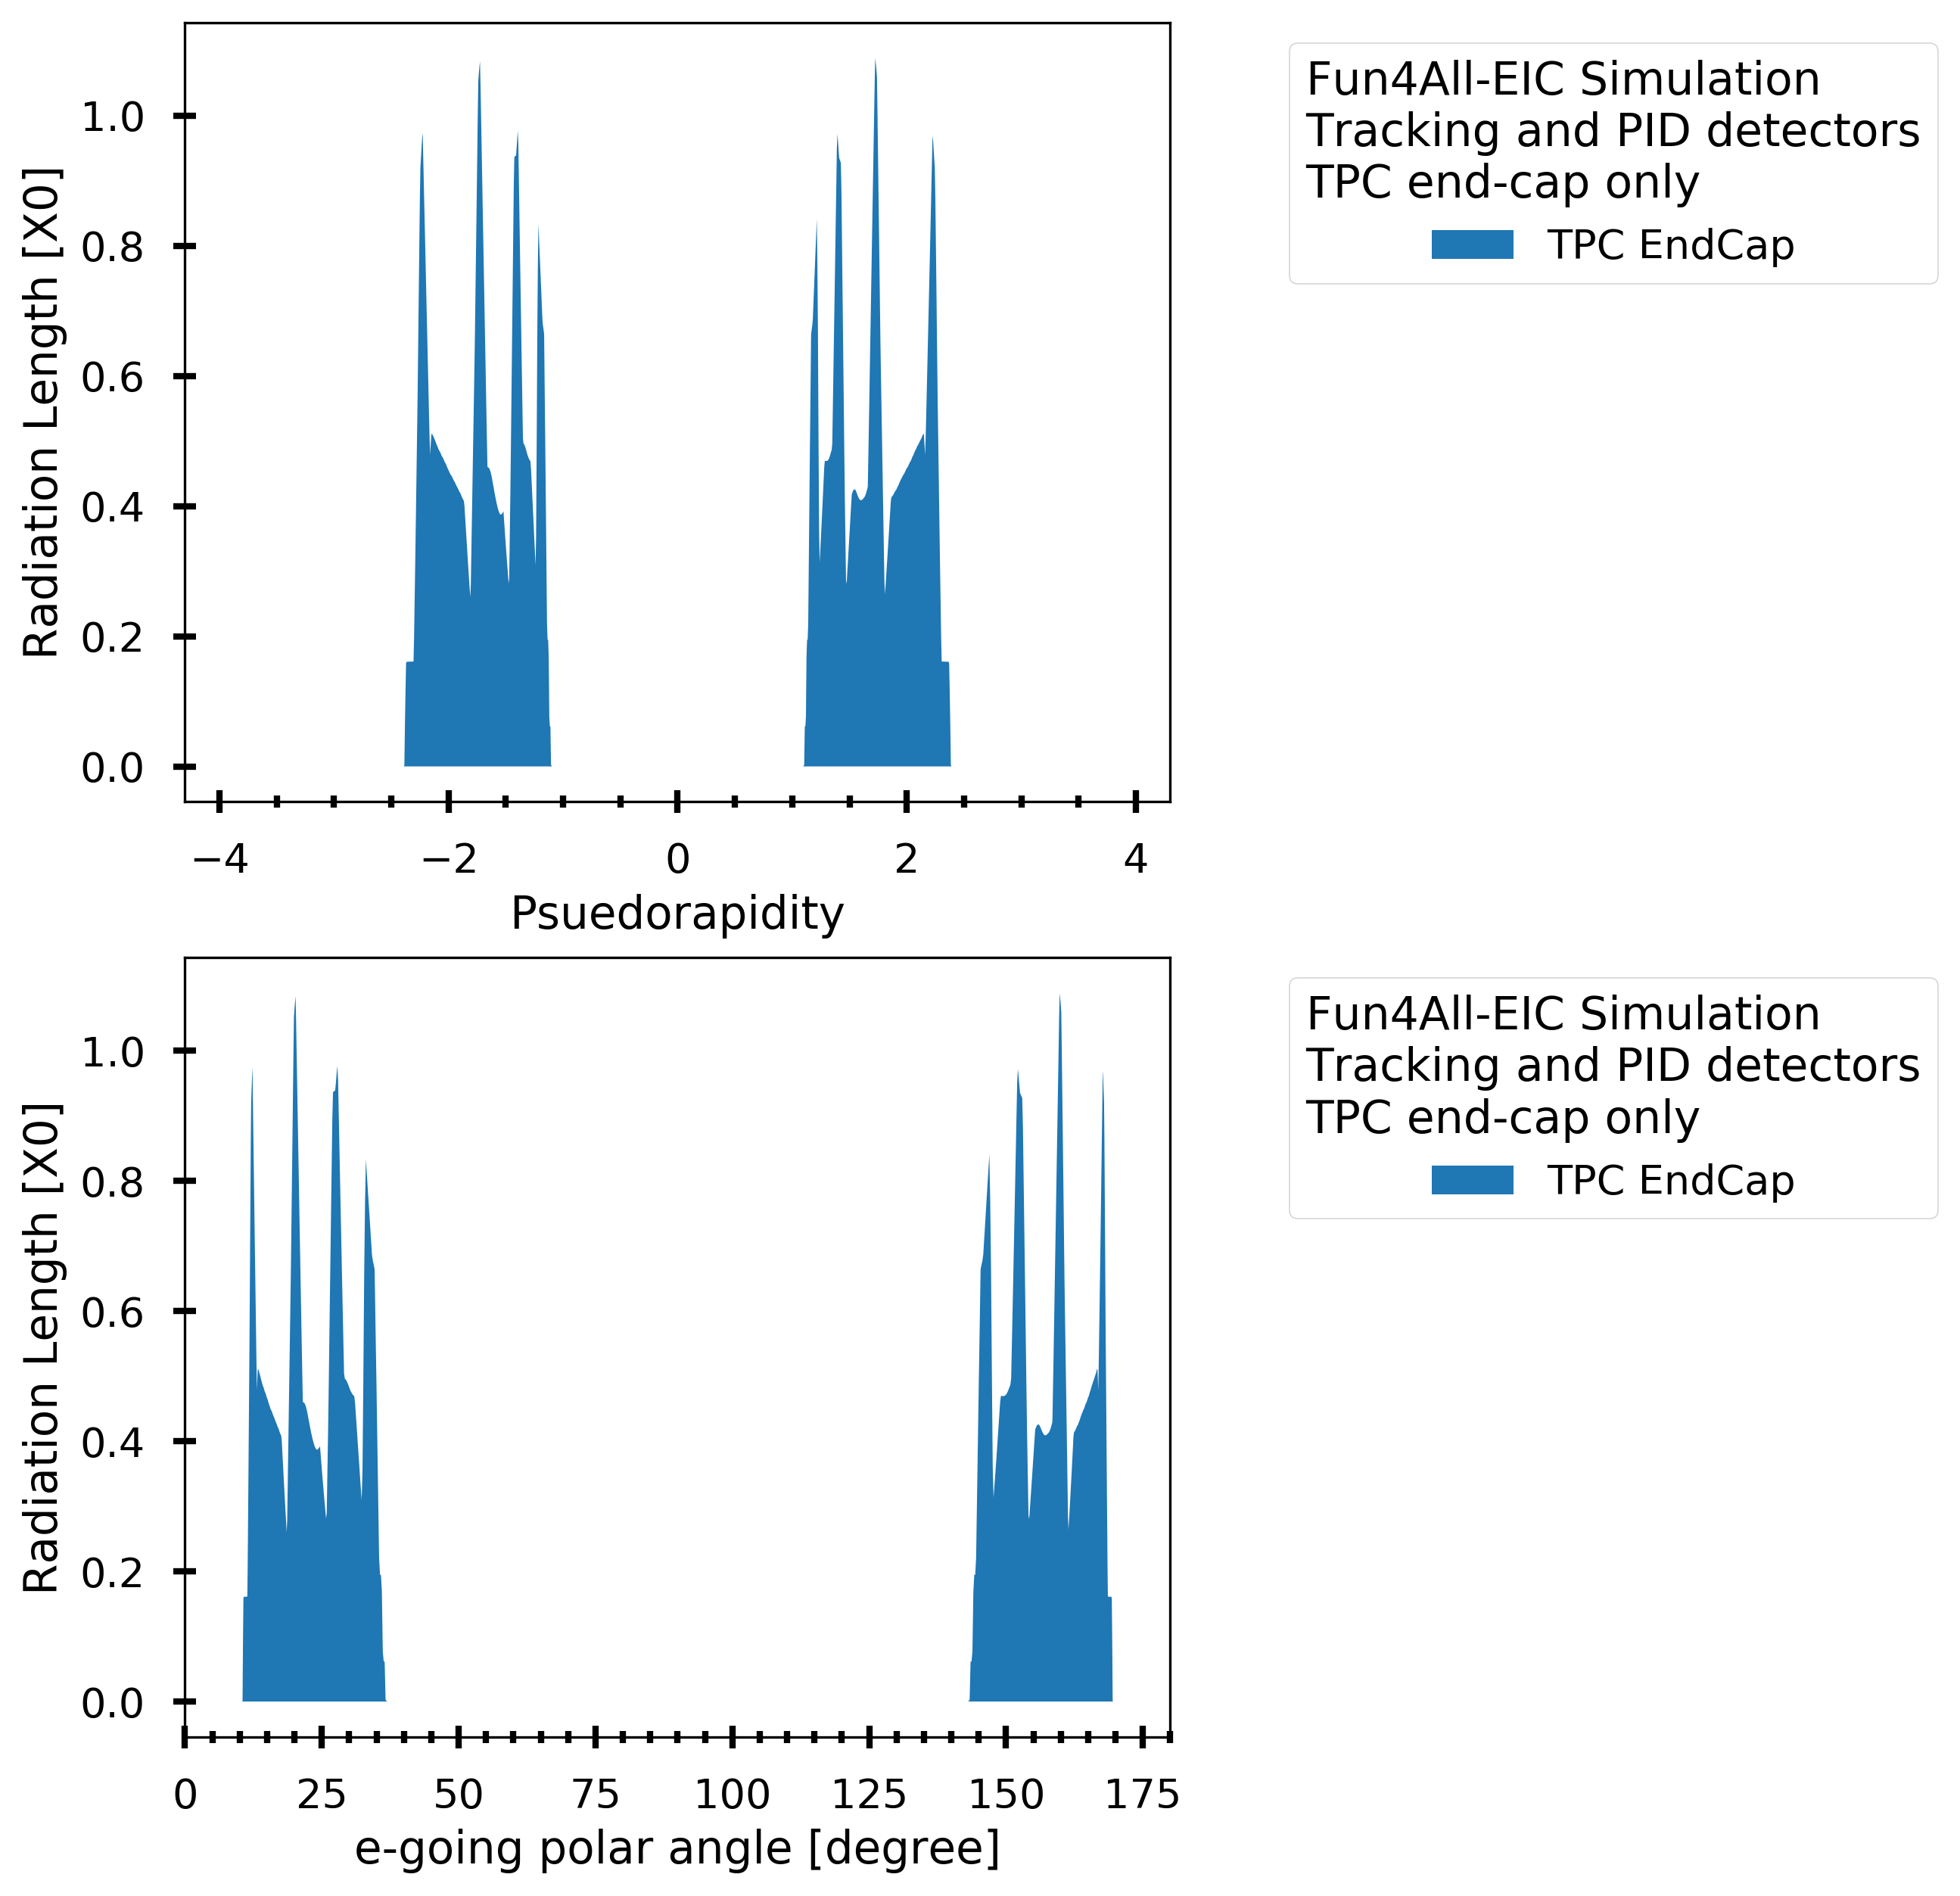

In [21]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), dpi=300)



datasets = sorted(df.index.levels[0].unique().to_list(), reverse=True)

for dataset in datasets:
    
    x0_avg = df.loc[(dataset),:].groupby('Theta').x0.mean()
    etas = -np.log(np.tan( ((90-x0_avg.index.to_numpy())/180*np.pi)/2 ))
    polar_angles = 180- ( 90-x0_avg.index.to_numpy() )
    DataSetLable = DataSetLables[dataset]
    
    axs[0].fill_between( etas, 0, x0_avg.to_numpy(), label=DataSetLable)
    
    axs[1].fill_between( polar_angles, 0, x0_avg.to_numpy(), label=DataSetLable)
   

ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
# ax.set_yscale('log')
ax.set_xlabel("Psuedorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
# ax.set_ylim([0, 0.4]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

ax=axs[1]
    
# ax.set_title('Raditioan Length Scans')
# ax.set_yscale('log')
ax.set_xlabel("e-going polar angle [degree]")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([0, 180]);
# ax.set_ylim([0, 0.4]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.png'), bbox_inches='tight')

Processing percentile = 0.1
Processing percentile = 0.2
Processing percentile = 0.3
Processing percentile = 0.4
Processing percentile = 0.5
Processing percentile = 0.6
Processing percentile = 0.7
Processing percentile = 0.8
Processing percentile = 0.9


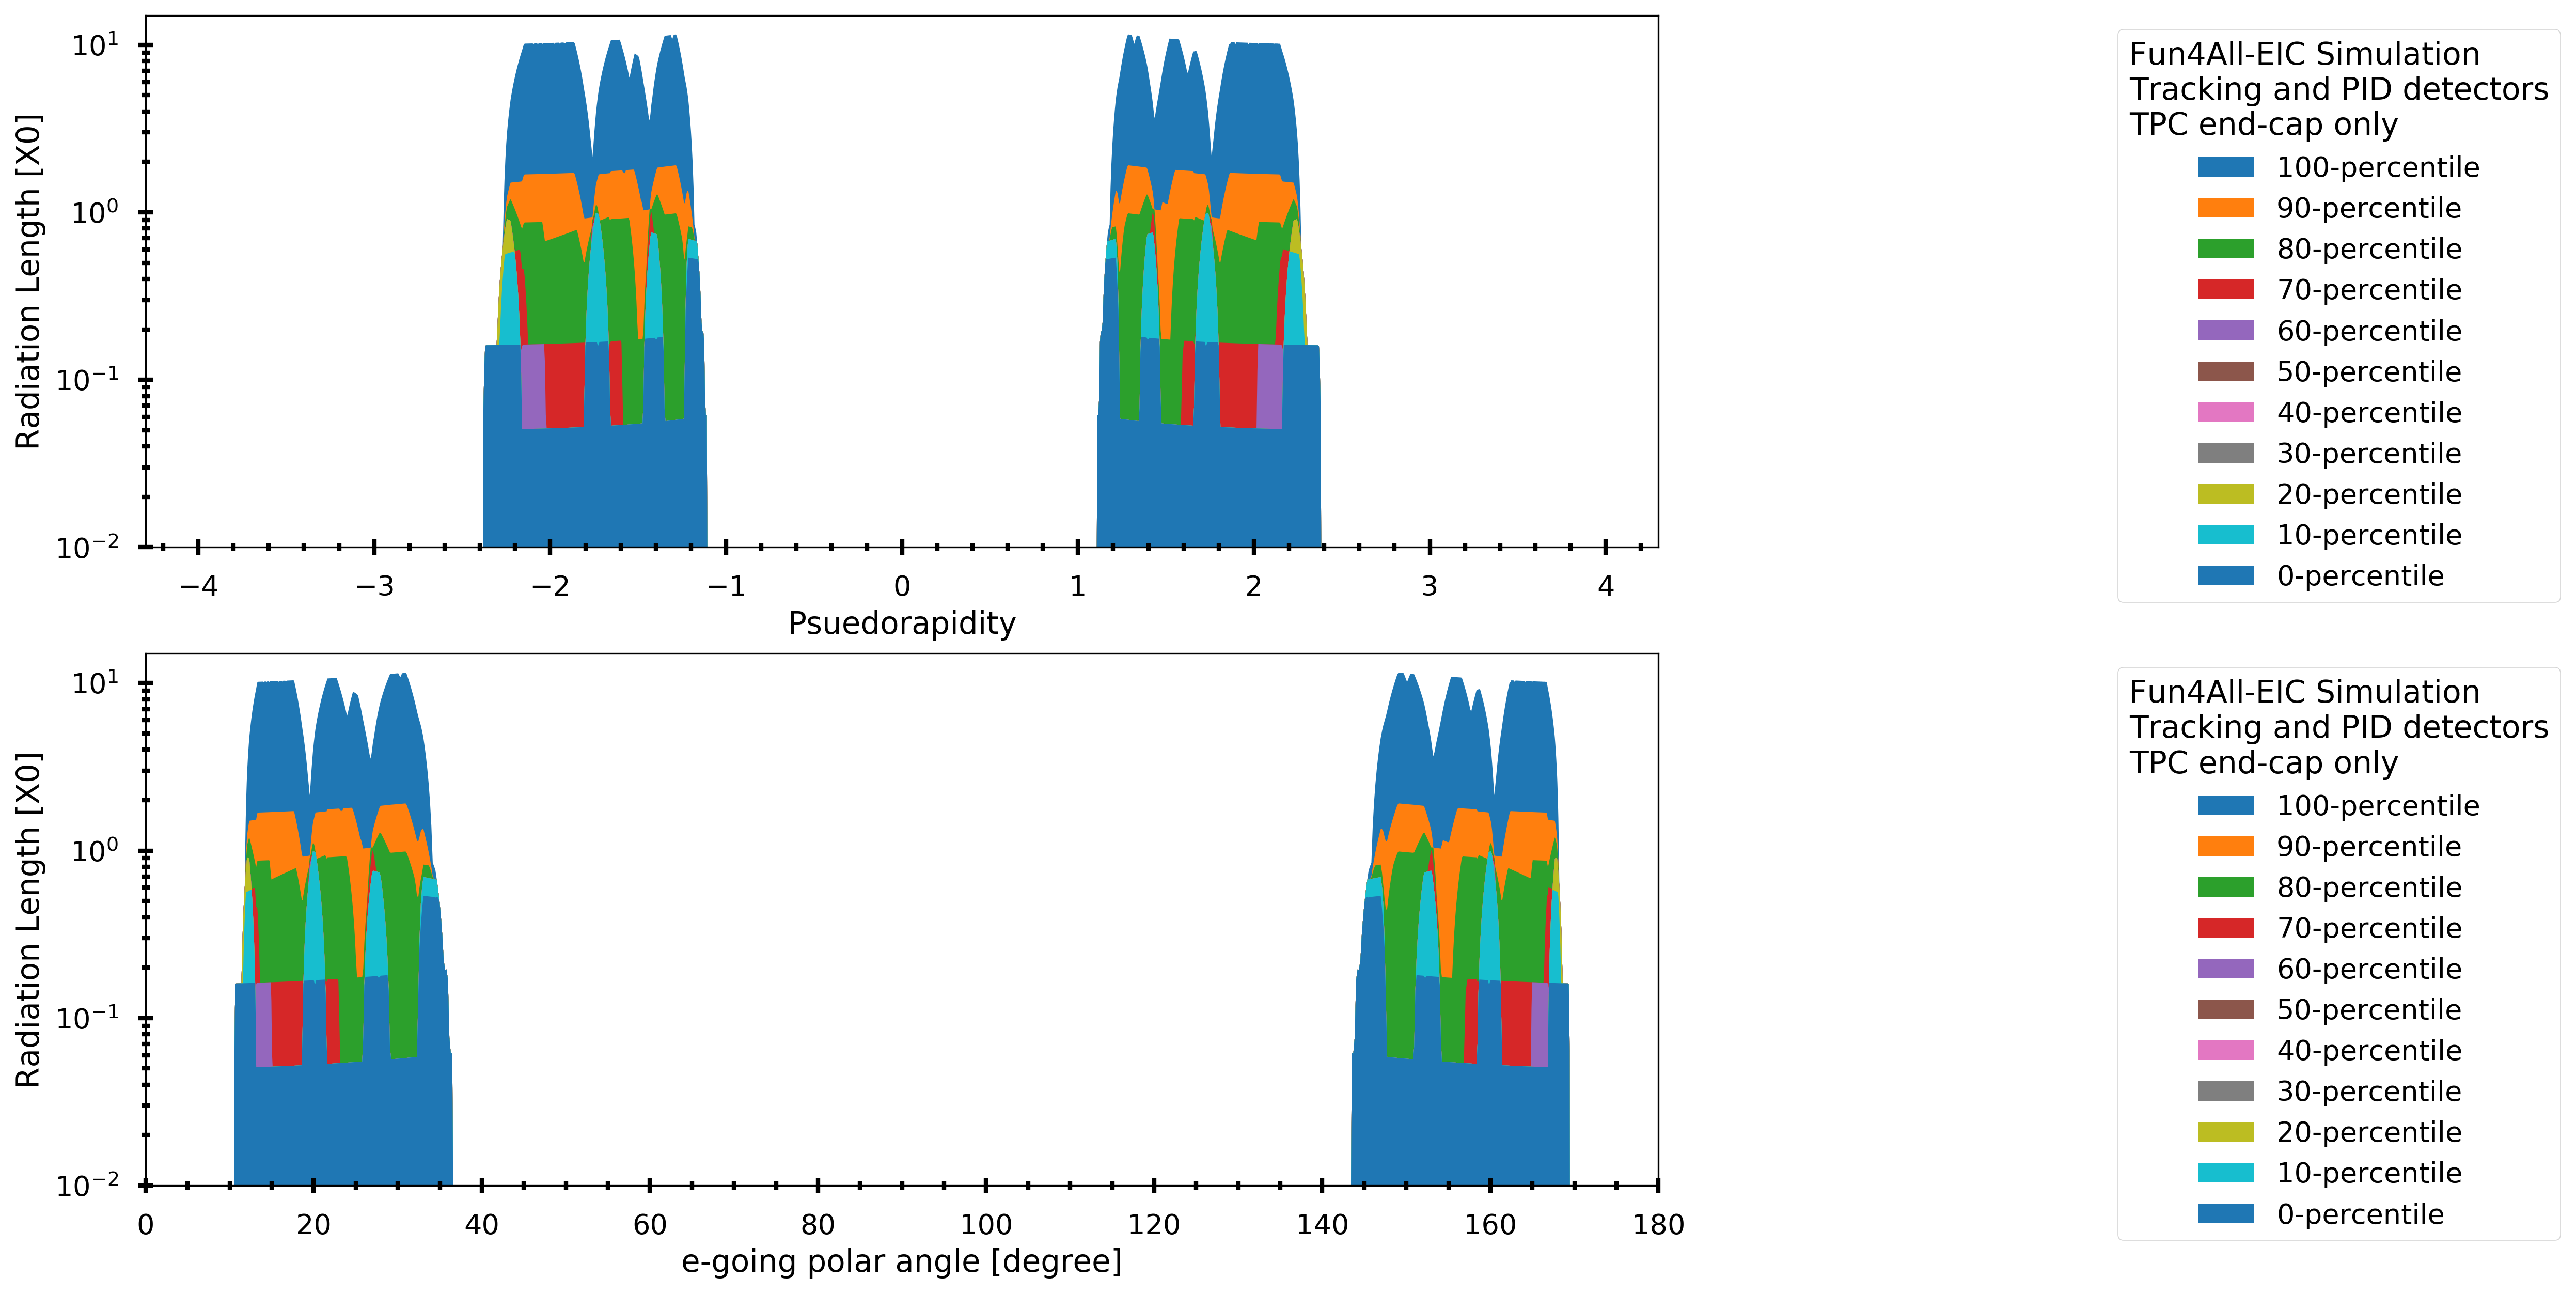

In [22]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), dpi=300)



datasets = sorted(df.index.levels[0].unique().to_list(), reverse=True)

for dataset in datasets:
    
    etas = -np.log(np.tan( ((90-x0_avg.index.to_numpy())/180*np.pi)/2 ))
    polar_angles = 180- ( 90-x0_avg.index.to_numpy() )
    DataSetLable = DataSetLables[dataset]
    
    
    x0_series =df.loc[(dataset),:].groupby('Theta').x0
    
    x0_avg = x0_series.mean()
    
    x0_dict = {0 :  x0_series.min(), 10: x0_series.max()}
    
    for index in np.arange(1,10):
        percentile = index *1./10.
        print (f'Processing percentile = {percentile}')
        x0_dict[index] = x0_series.quantile(percentile);
    
    for percentile in np.arange(10, -1, -1):
        label = "%.0f-percentile" % (percentile*10)
        
        axs[0].fill_between( etas, 0, x0_dict[percentile], label=label)
        axs[1].fill_between( polar_angles, 0, x0_dict[percentile], label=label)

        
        
ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
ax.set_yscale('log')
ax.set_xlabel("Psuedorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
ax.set_ylim([1e-2, 15]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

ax=axs[1]
    
# ax.set_title('Raditioan Length Scans')
ax.set_yscale('log')
ax.set_xlabel("e-going polar angle [degree]")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([0, 180]);
ax.set_ylim([1e-2, 15]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.png'), bbox_inches='tight')

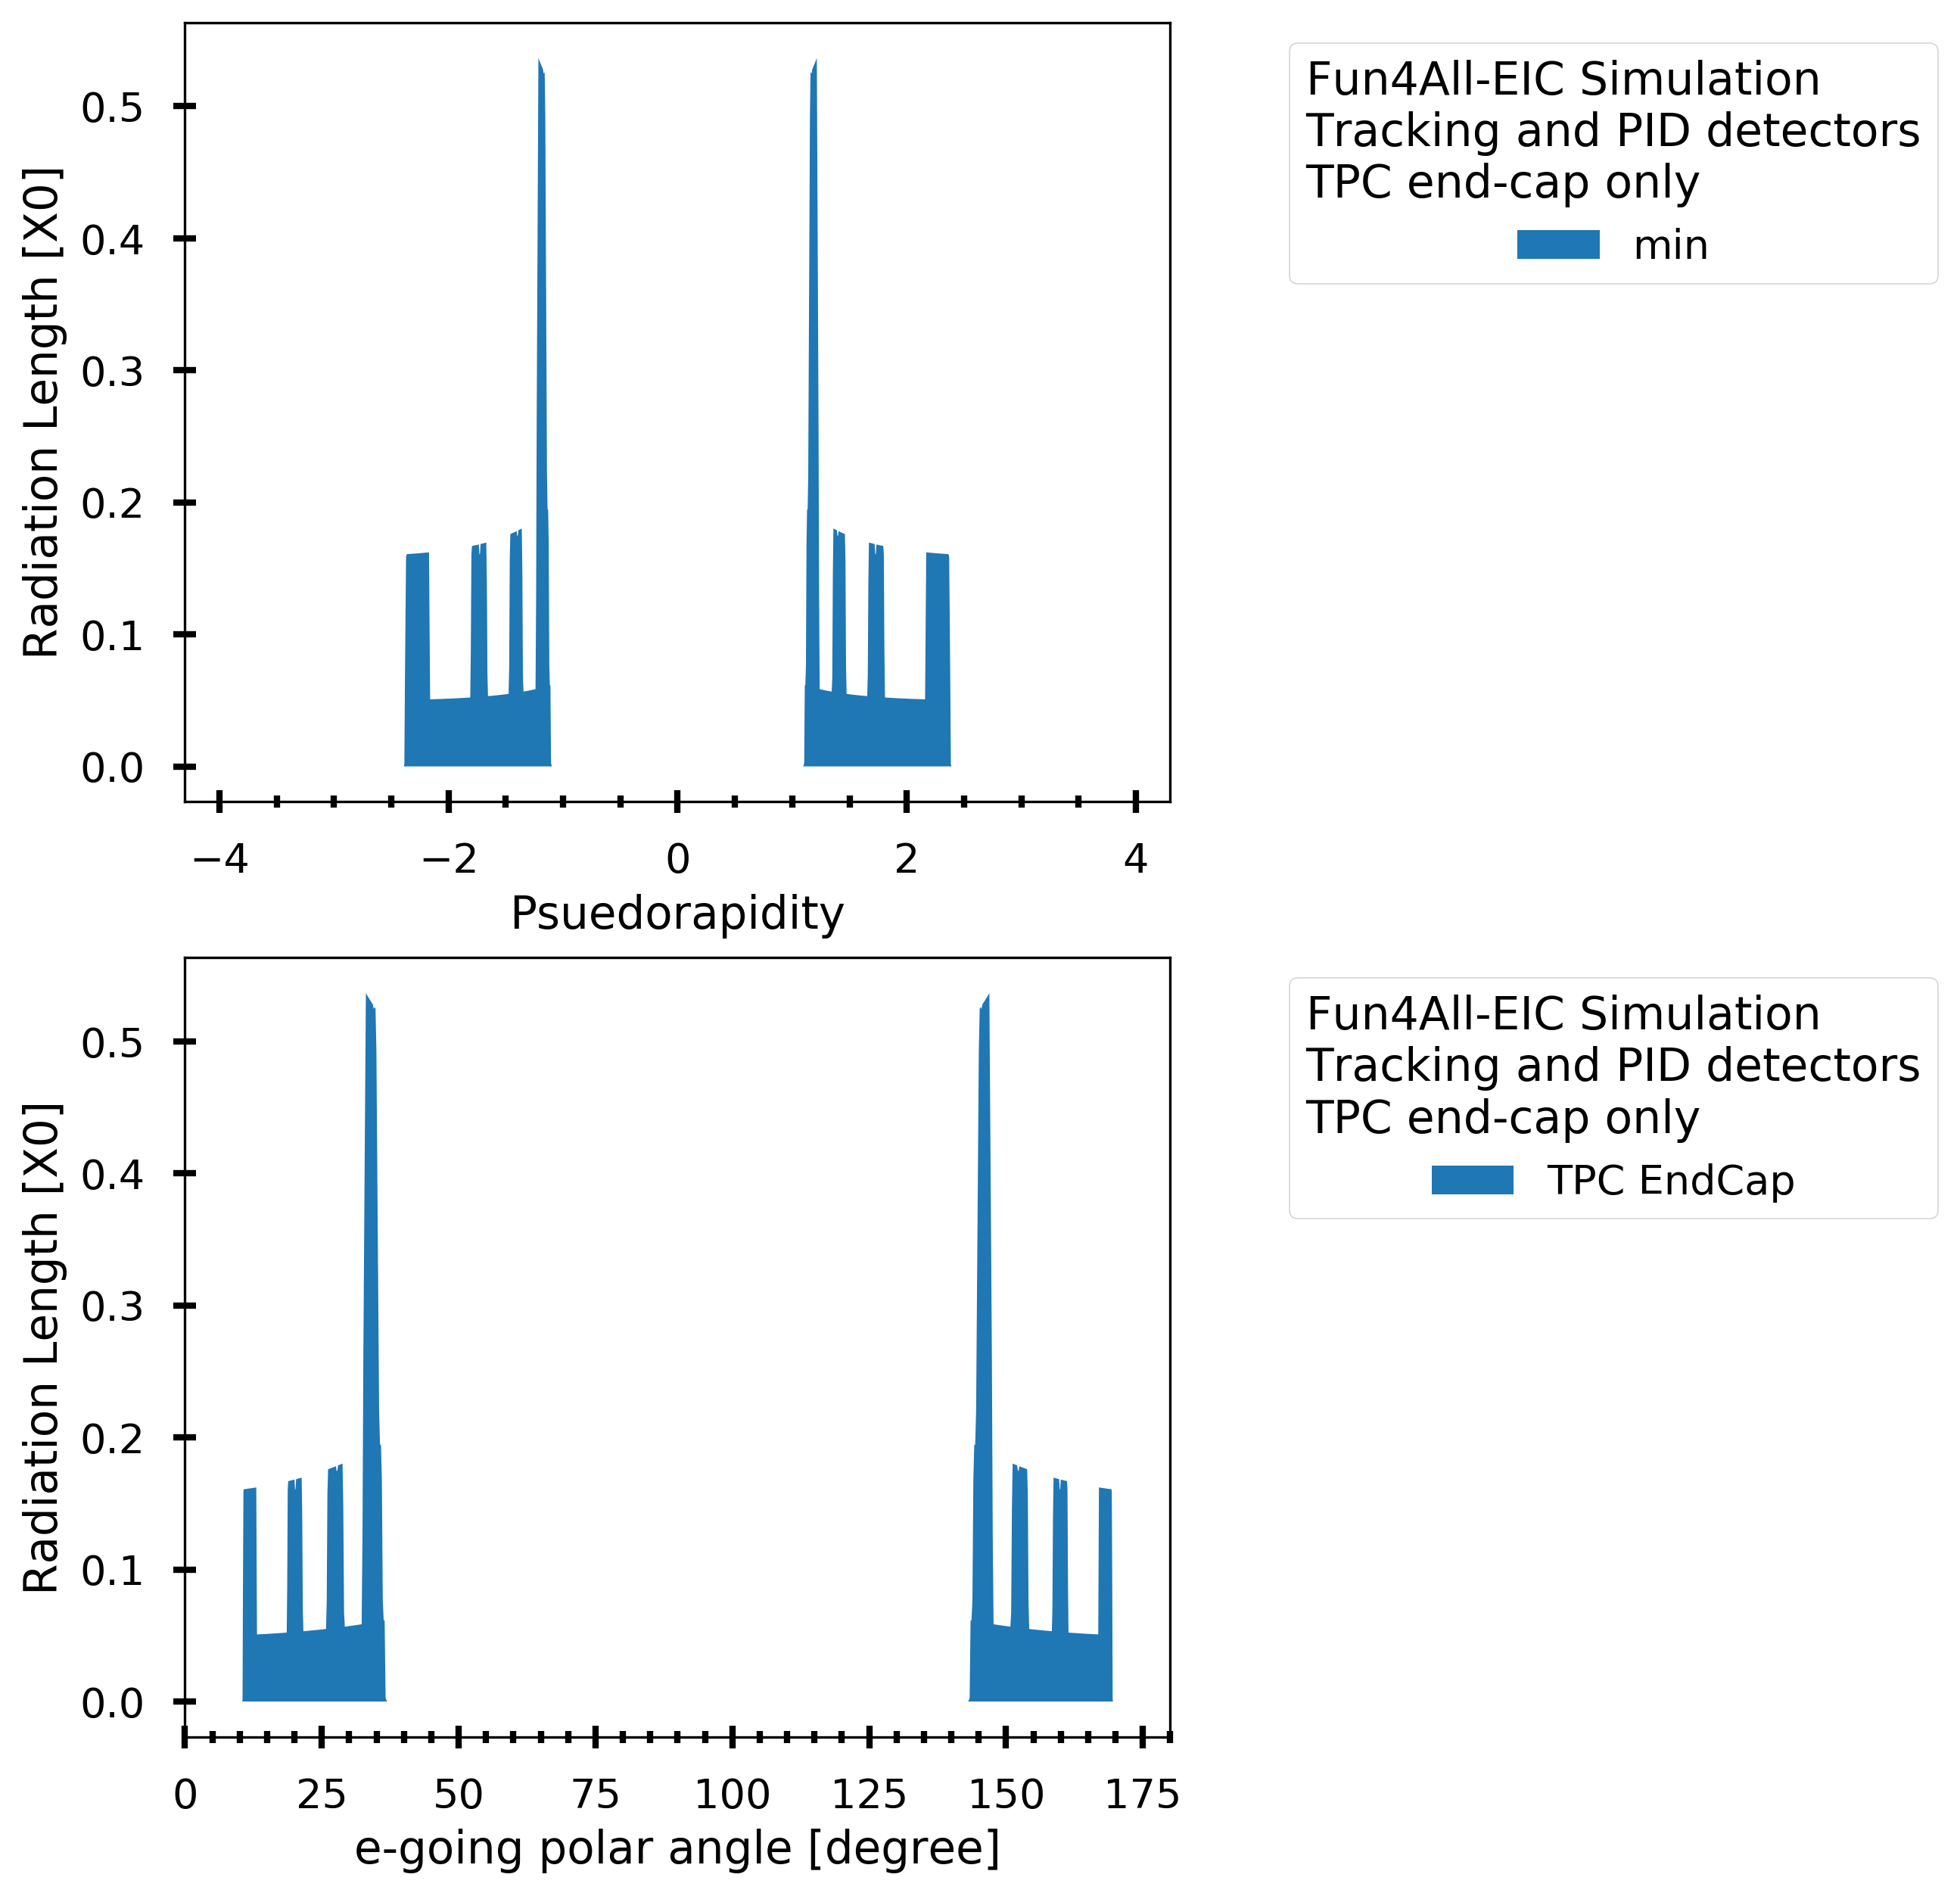

In [23]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), dpi=300)



datasets = sorted(df.index.levels[0].unique().to_list(), reverse=True)

for dataset in datasets:
    
    etas = -np.log(np.tan( ((90-x0_avg.index.to_numpy())/180*np.pi)/2 ))
    polar_angles = 180- ( 90-x0_avg.index.to_numpy() )
    DataSetLable = DataSetLables[dataset]
    
    
    x0_series =df.loc[(dataset),:].groupby('Theta').x0
    
    x0_avg = x0_series.mean()    
    
    x0_min = x0_series.min()
    x0_max = x0_series.max()
#     x0_quanties = x0_series.quantile(np.linspace(.1,.9,9))
    
    axs[0].fill_between( etas, 0, x0_min.to_numpy(), label='min')
#     axs[0].fill_between( etas, 0, x0_max.to_numpy(), label='max')
    
    axs[1].fill_between( polar_angles, 0, x0_min.to_numpy(), label=DataSetLable)
   

ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
# ax.set_yscale('log')
ax.set_xlabel("Psuedorapidity")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([-4.3, 4.3]);
# ax.set_ylim([0, 0.4]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

ax=axs[1]
    
# ax.set_title('Raditioan Length Scans')
# ax.set_yscale('log')
ax.set_xlabel("e-going polar angle [degree]")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([0, 180]);
# ax.set_ylim([0, 0.4]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.png'), bbox_inches='tight')

Processing percentile = 1
Processing percentile = 0.9
Processing percentile = 0.8
Processing percentile = 0.7
Processing percentile = 0.6
Processing percentile = 0


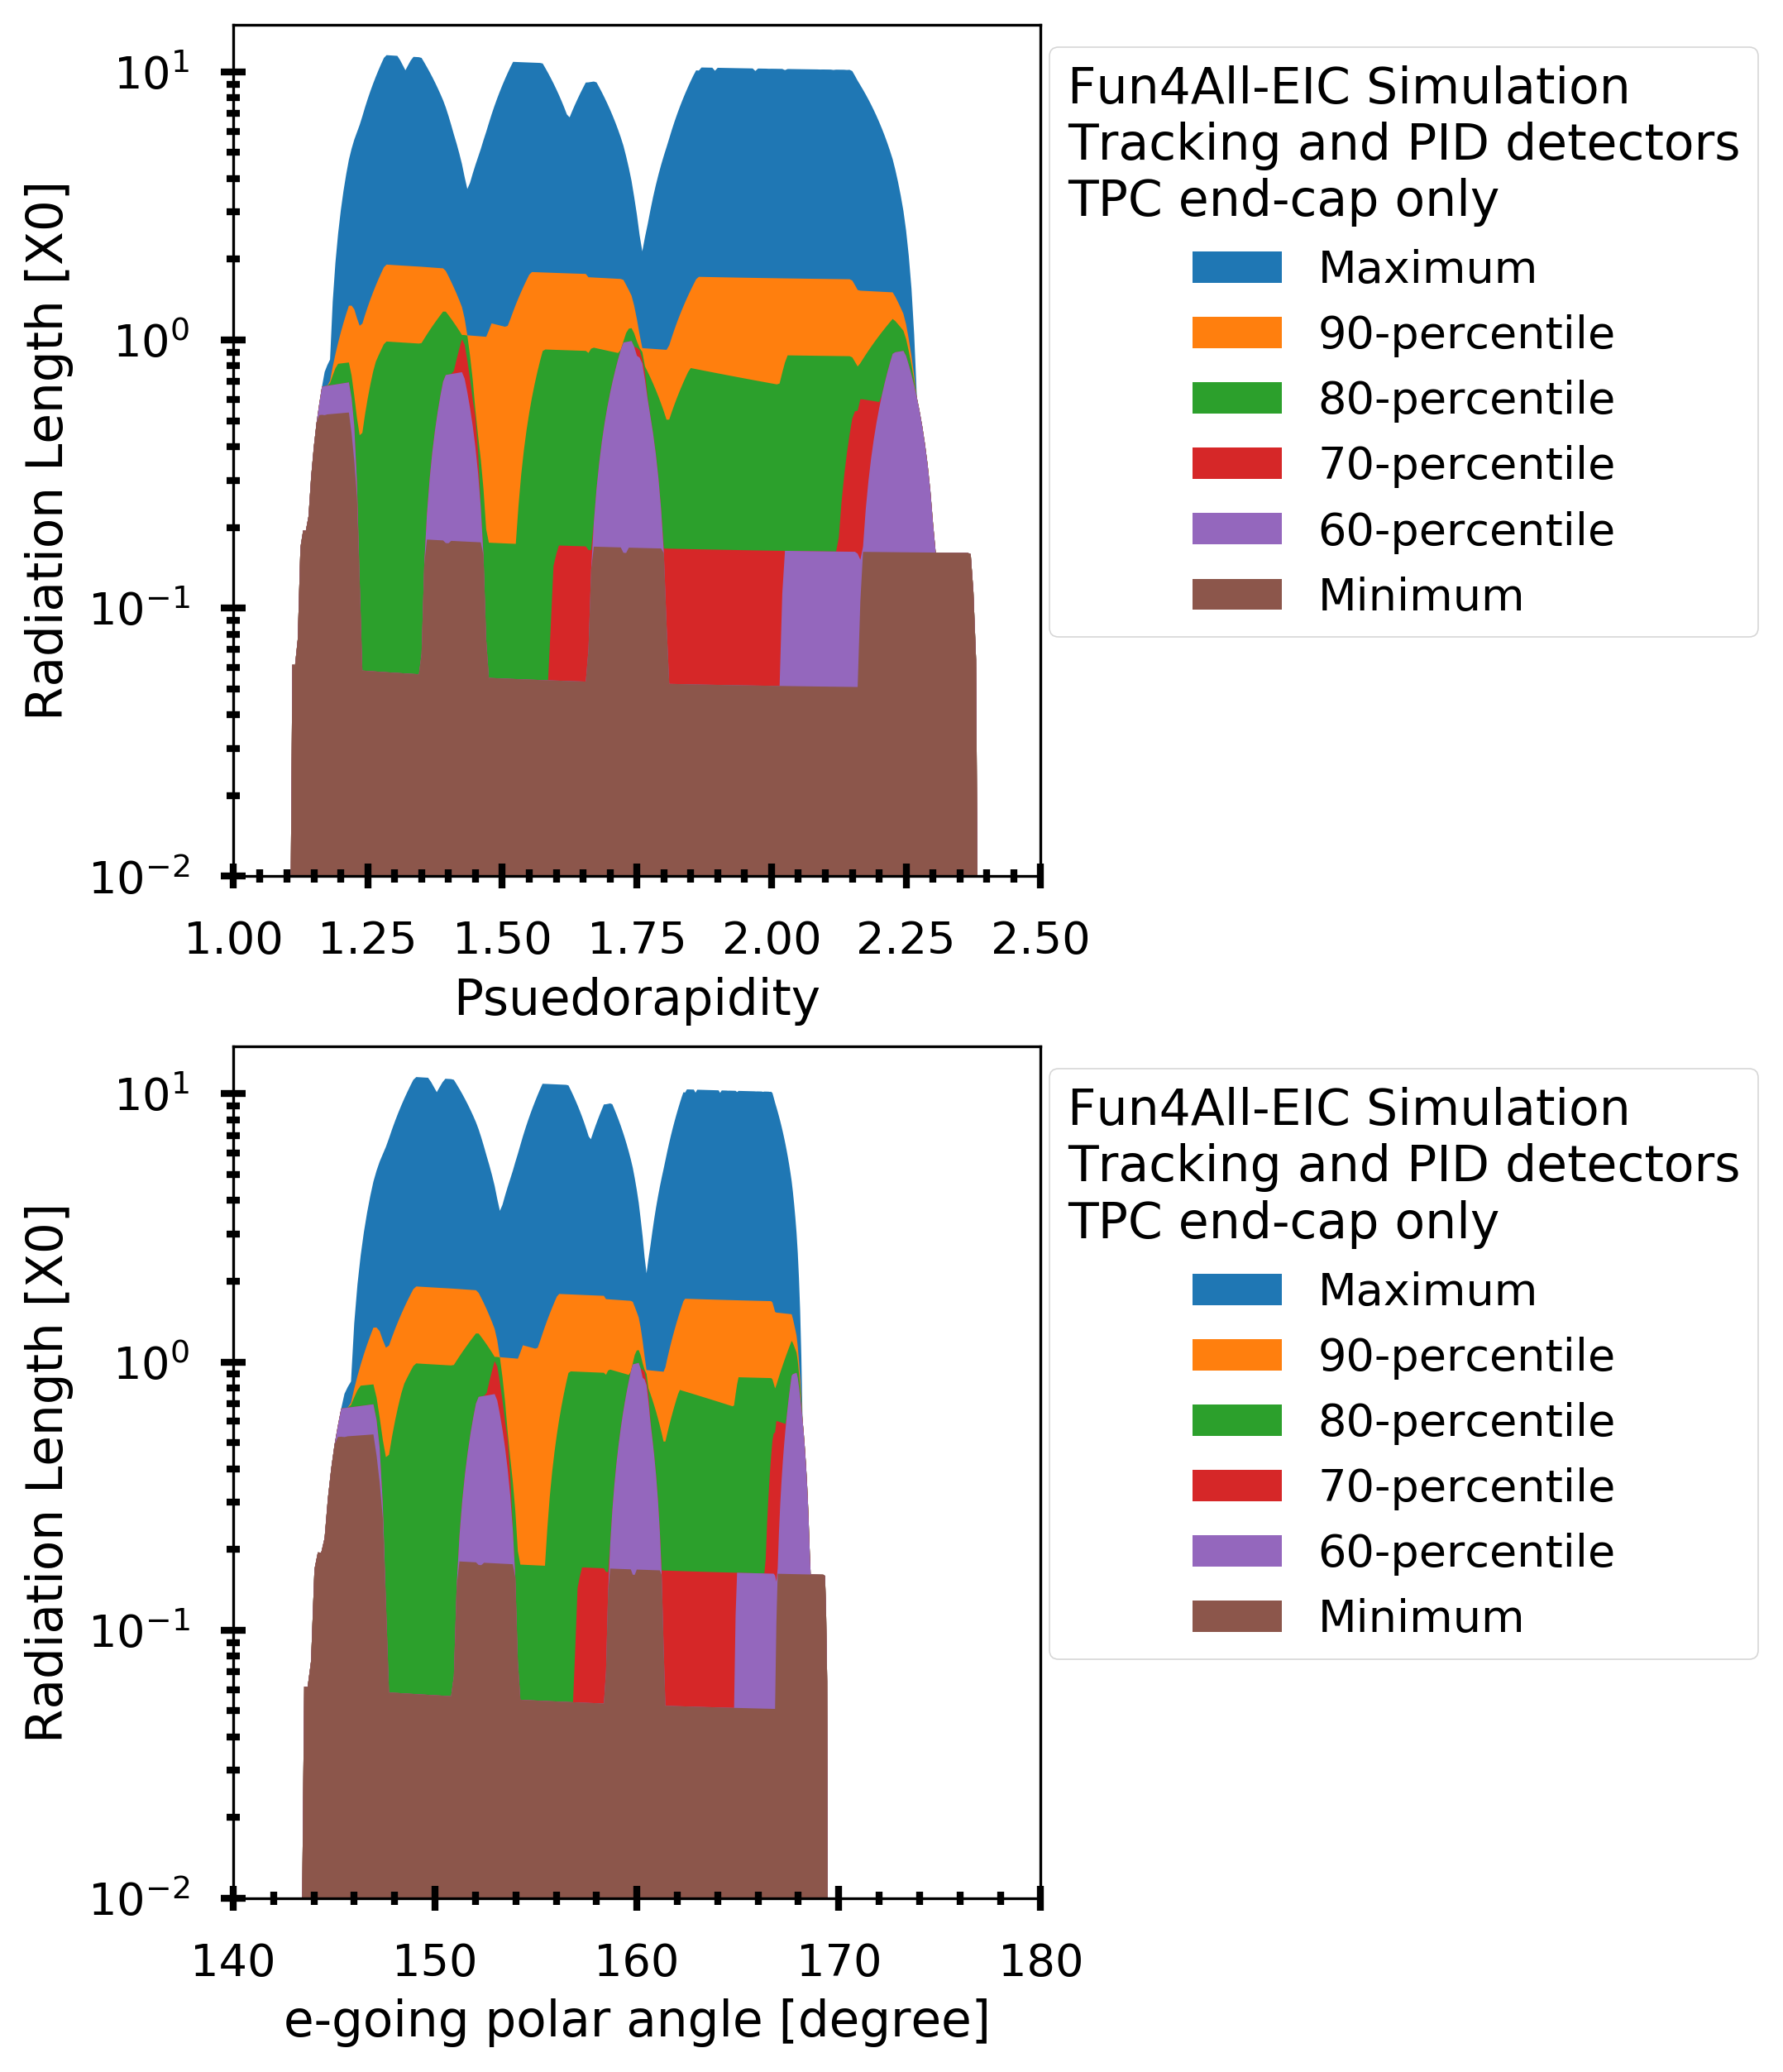

In [24]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 10), dpi=300)



datasets = sorted(df.index.levels[0].unique().to_list(), reverse=True)

for dataset in datasets:
    
    etas = -np.log(np.tan( ((90-x0_avg.index.to_numpy())/180*np.pi)/2 ))
    polar_angles = 180- ( 90-x0_avg.index.to_numpy() )
    DataSetLable = DataSetLables[dataset]
    
    
    x0_series =df.loc[(dataset),:].groupby('Theta').x0
    
    x0_avg = x0_series.mean()
    
    x0_dict = {0 :  x0_series.min(), 1: x0_series.max()}
    
    scanlist = [.6, .7,.8,.9]
    plotlist = scanlist
    plotlist.insert(0,0)
    plotlist.append(1)
    plotlist.reverse()
    
    for percentile in scanlist:
#         percentile = index *1./10.
        print (f'Processing percentile = {percentile}')
        x0_dict[percentile] = x0_series.quantile(percentile);
    
    for percentile in plotlist:
        label = "%.0f-percentile" % (percentile*100)
        if percentile == 0:
            label = 'Minimum'
        if percentile == 1:
            label = 'Maximum'
        
        axs[0].fill_between( etas, 0, x0_dict[percentile], label=label)
        axs[1].fill_between( polar_angles, 0, x0_dict[percentile], label=label)

        
        
ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
ax.set_yscale('log')
ax.set_xlabel("Psuedorapidity")
ax.set_ylabel("Radiation Length [X0]")
# ax.set_xlim([-4.3, 4.3]);
ax.set_xlim([1, 2.5]);
ax.set_ylim([1e-2, 15]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

ax=axs[1]
    
# ax.set_title('Raditioan Length Scans')
ax.set_yscale('log')
ax.set_xlabel("e-going polar angle [degree]")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([140, 180]);
ax.set_ylim([1e-2, 15]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.png'), bbox_inches='tight')

Processing percentile = 0.98
Processing percentile = 0.9
Processing percentile = 0.8
Processing percentile = 0.7
Processing percentile = 0.6
Processing percentile = 0.5
Processing percentile = 0


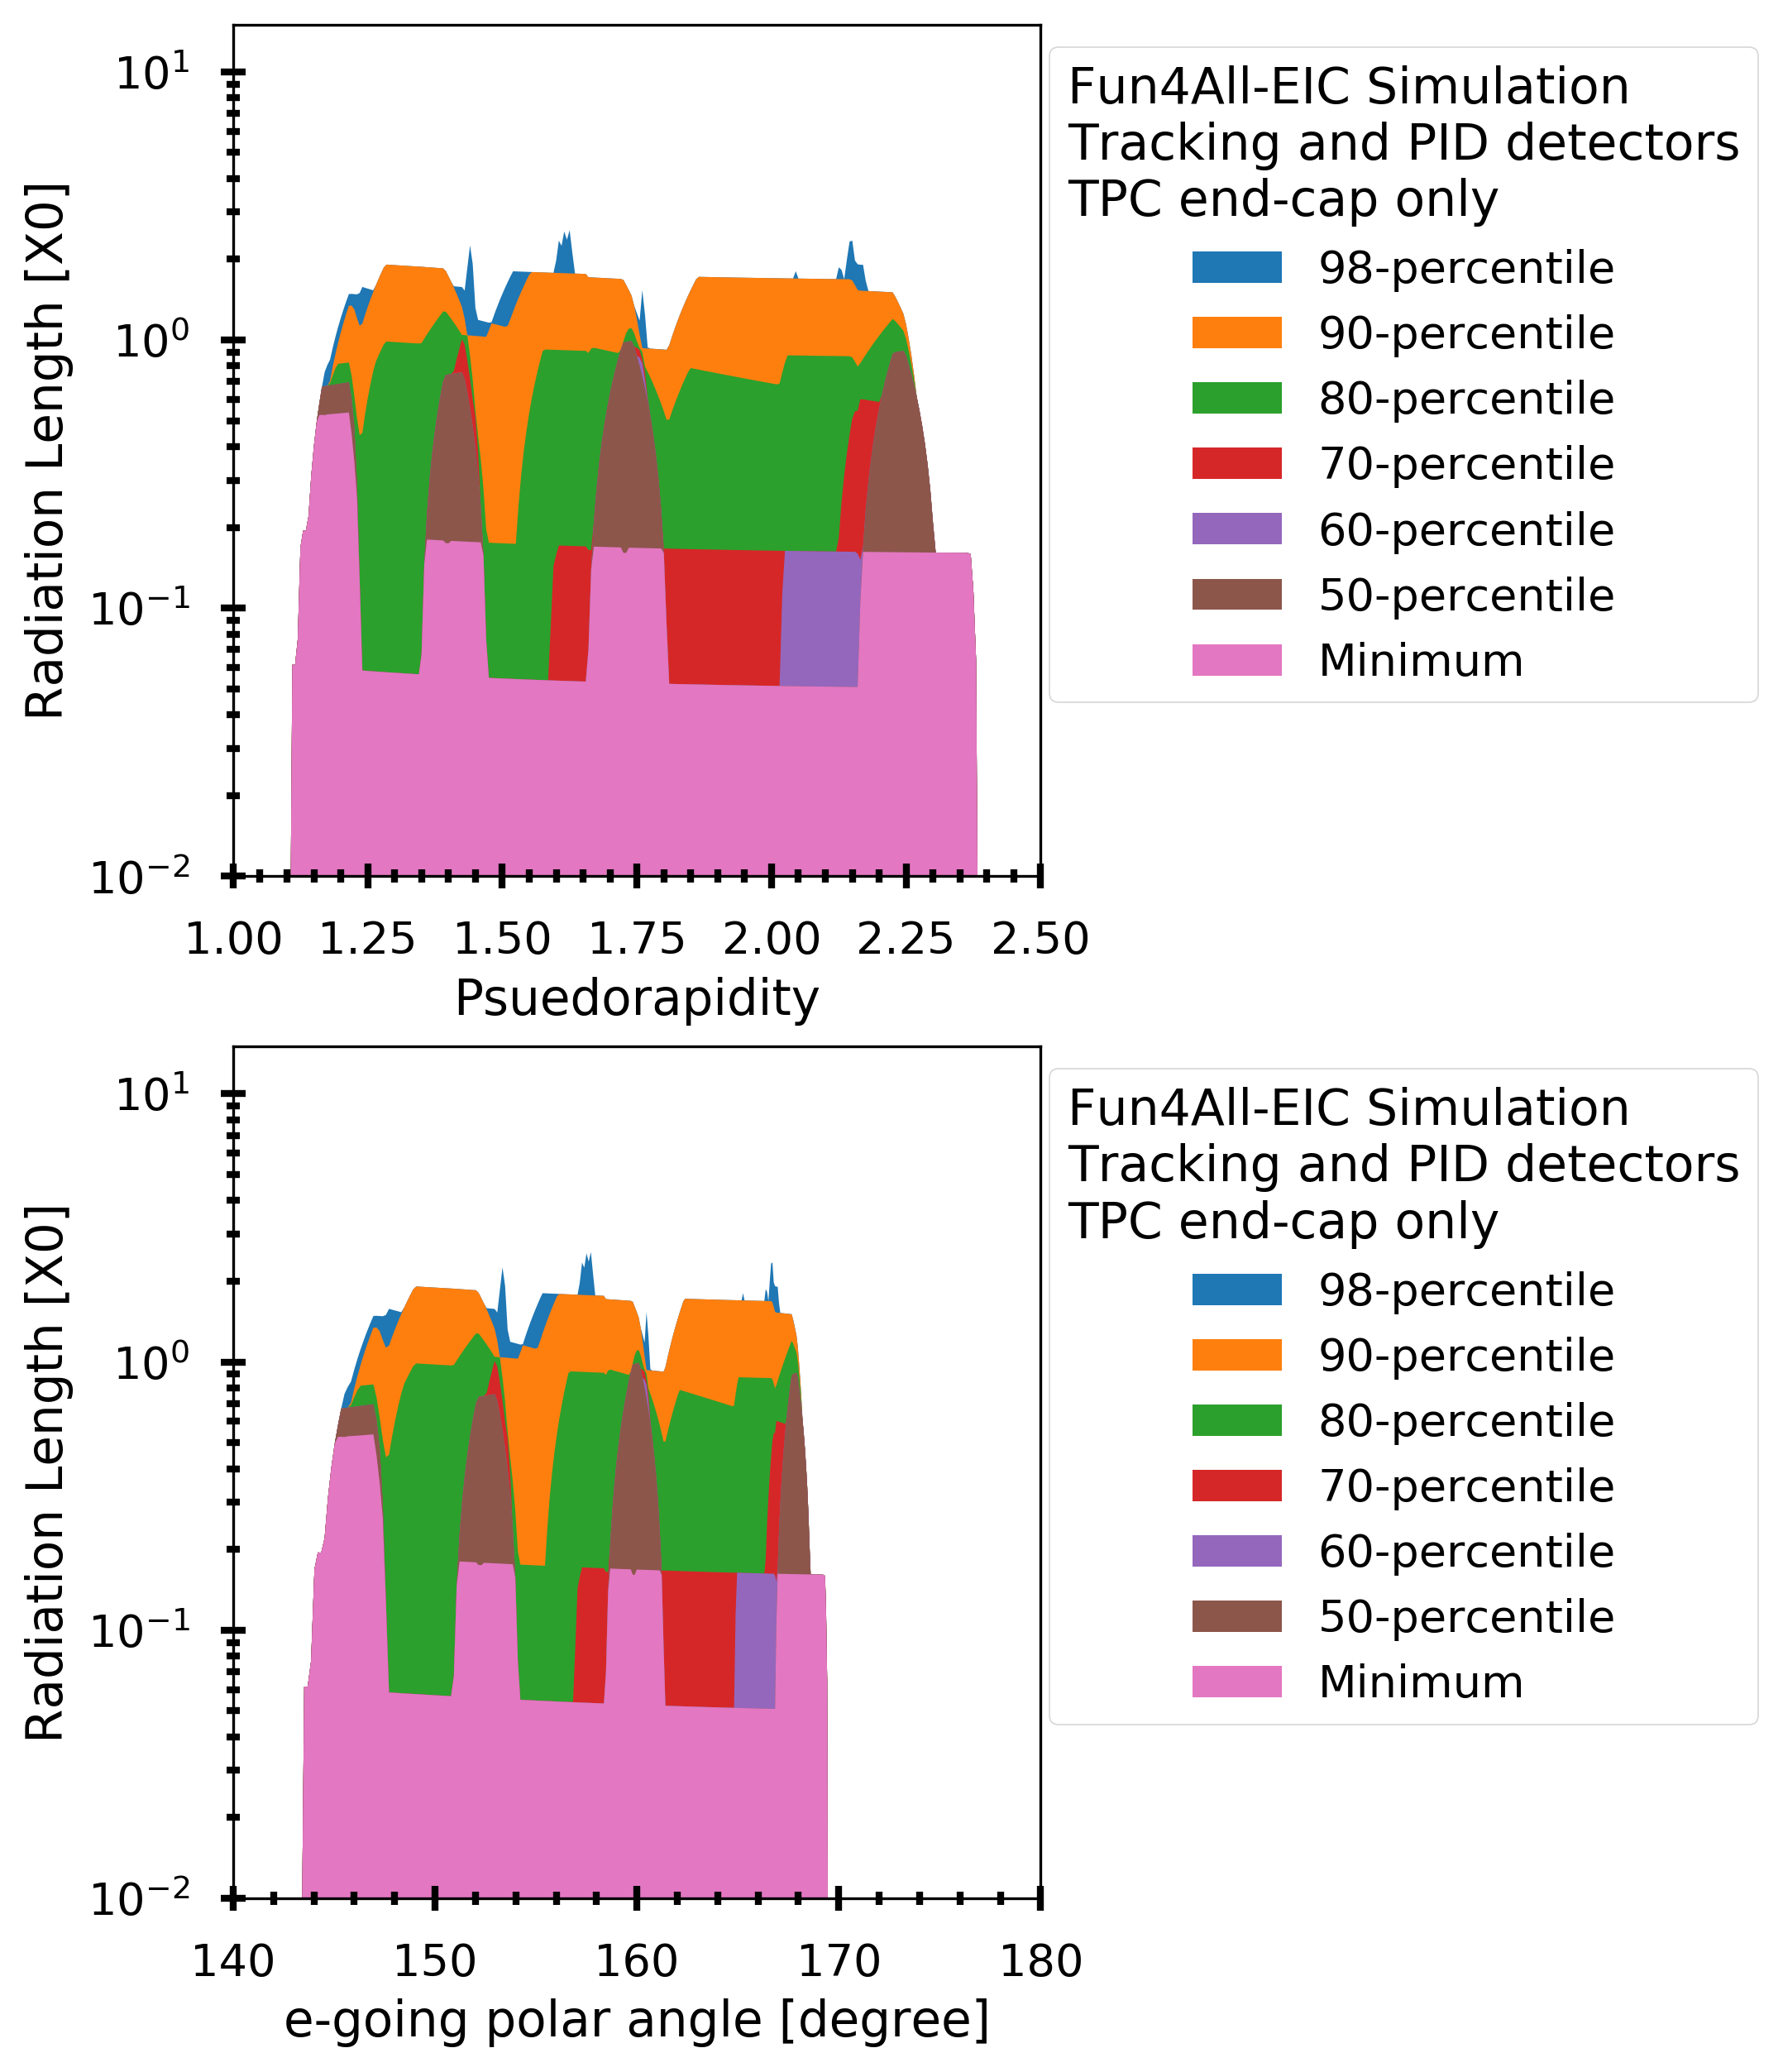

In [30]:
# fig= plt.figure(num=None, figsize=(8, 16), dpi=80, facecolor='w', edgecolor='k')
# ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 10), dpi=300)



datasets = sorted(df.index.levels[0].unique().to_list(), reverse=True)

for dataset in datasets:
    
    etas = -np.log(np.tan( ((90-x0_avg.index.to_numpy())/180*np.pi)/2 ))
    polar_angles = 180- ( 90-x0_avg.index.to_numpy() )
    DataSetLable = DataSetLables[dataset]
    
    
    x0_series =df.loc[(dataset),:].groupby('Theta').x0
    
    x0_avg = x0_series.mean()
    
#     x0_dict = {0 :  x0_series.min(), 1: x0_series.max()}
    x0_dict = {0 :  x0_series.min()}
    
    scanlist = [.5, .6, .7,.8,.9,.98]
    plotlist = scanlist
    plotlist.insert(0,0)
#     plotlist.append(1)
    plotlist.reverse()
    
    for percentile in scanlist:
#         percentile = index *1./10.
        print (f'Processing percentile = {percentile}')
        x0_dict[percentile] = x0_series.quantile(percentile);
    
    for percentile in plotlist:
        label = "%.0f-percentile" % (percentile*100)
        if percentile == 0:
            label = 'Minimum'
        if percentile == 1:
            label = 'Maximum'
        
        axs[0].fill_between( etas, 0, x0_dict[percentile], label=label)
        axs[1].fill_between( polar_angles, 0, x0_dict[percentile], label=label)

        
        
ax=axs[0]
    
# ax.set_title(f'Fun4All-EIC Simulation. Tracking and PID detectors\n{CautiousLabel}')
ax.set_yscale('log')
ax.set_xlabel("Psuedorapidity")
ax.set_ylabel("Radiation Length [X0]")
# ax.set_xlim([-4.3, 4.3]);
ax.set_xlim([1, 2.5]);
ax.set_ylim([1e-2, 15]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

ax=axs[1]
    
# ax.set_title('Raditioan Length Scans')
ax.set_yscale('log')
ax.set_xlabel("e-going polar angle [degree]")
ax.set_ylabel("Radiation Length [X0]")
ax.set_xlim([140, 180]);
ax.set_ylim([1e-2, 15]);

ax.tick_params(which='both',direction='inout');
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.7, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 1), ncol=1,
         title = f'Fun4All-EIC Simulation\nTracking and PID detectors\n{CautiousLabel}',
         title_fontsize='x-large'
         )

plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(f'{file_base}_Raditioan_Length.png'), bbox_inches='tight')